In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
email_df = pd.read_csv('spam.csv', encoding='latin-1')
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
selected_cols = ['v1', 'v2']

In [13]:
email_df1 = email_df[selected_cols]

In [34]:
email_df1['result'].value_counts()

ham     4825
spam     747
Name: result, dtype: int64

In [35]:
email_df1.head(2)

,result,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [51]:
email_df1.rename(columns = {"targets": "target"}, inplace=True)

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\182329525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df1.rename(columns = {"targets": "target"}, inplace=True)


In [52]:
email_df1

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [55]:
email_df1.rename(columns = {'messages':'text'}, inplace=True)

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\2689145661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df1.rename(columns = {'messages':'text'}, inplace=True)


In [56]:
email_df1.sample(5)

,target,text
5413,ham,Nite nite pocay wocay luv u more than n e thin...
2117,ham,Wish u many many returns of the day.. Happy bi...
1099,ham,Been up to ne thing interesting. Did you have ...
3062,spam,"Hi babe its Jordan, how r u? Im home from abro..."
3941,ham,She's borderline but yeah whatever.


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
email_df1['target'] = encoder.fit_transform(email_df1['target'])

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\2910958615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df1['target'] = encoder.fit_transform(email_df1['target'])


In [60]:
email_df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [61]:
#ham = 0 +++++++ spam = 1

In [62]:
email_df1.isna().sum()

target    0
text      0
dtype: int64

In [63]:
email_df1.duplicated().sum()

403

In [64]:
df = email_df1.drop_duplicates()

In [65]:
df.duplicated().sum()

0

In [66]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

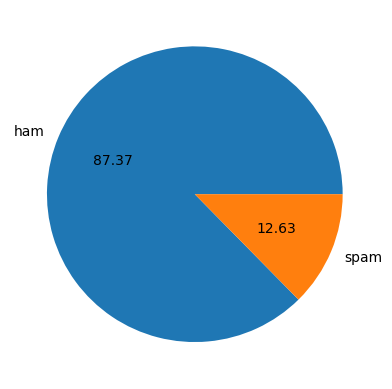

In [68]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [69]:
import nltk

In [70]:
df['num_characters'] = df['text'].apply(len)

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [71]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [72]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [73]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [74]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\1263001847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [78]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [79]:
#Define the workflow first

#data cleaning
#EDA
#data processing
#feature engineering
#modeling building
#evaluation
#improvement
#website
#deploy

## Data Processing

In [80]:
#data processing, lowercase, tokenize,  remove special characters, remove punctuation, remove stopwords, stemming

In [84]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [147]:
text = df['text']
text[2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [132]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer

wordnet = WordNetLemmatizer()

ps = PorterStemmer()

In [144]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text_normal = []
    for i in text:
        if i.isalnum():
            text_normal.append(i)
    text = text_normal[:]
    text_normal.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text_normal.append(i)
            
    text = text_normal[:]
    text_normal.clear()
    
    for i in text:
        text_normal.append(ps.stem(i))
        
    return " ".join(text_normal)
    

In [95]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [148]:
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'go sch mon si need take smth'

In [150]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [151]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi great world l...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif oni


In [152]:
df['num_characters_trans'] = df['transformed_text'].apply(len)

C:\Users\grainstudio\AppData\Local\Temp\ipykernel_26552\942290638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters_trans'] = df['transformed_text'].apply(len)


In [153]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text,num_characters_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi great world l...,72
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif oni,19


In [157]:
ham_word = df[df['target'] == 0]
spam_word = df[df['target'] == 1]

In [158]:
spam_word

,target,text,num_characters,num_words,num_sentences,transformed_text,num_characters_trans
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...,123
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl week word back like fun still...,73
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...,97
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month entitl updat latest colour mobi...,96
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...,80
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...,71
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...,115
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...,111
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...,93


In [166]:
from wordcloud import WordCloud

In [192]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [193]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

(-0.5, 499.5, 499.5, -0.5)

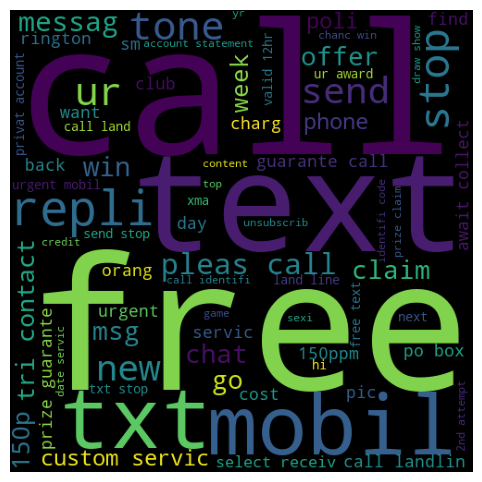

In [194]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)
plt.axis('off')

In [195]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

(-0.5, 499.5, 499.5, -0.5)

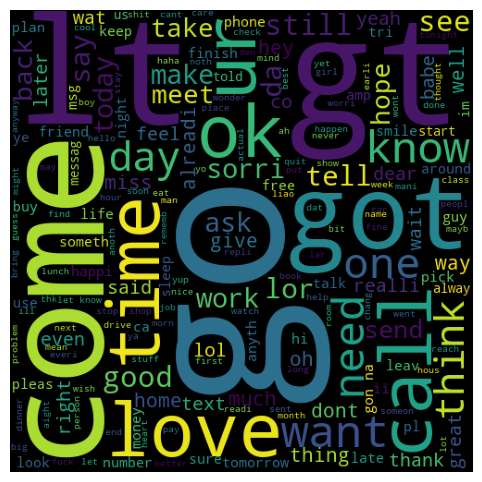

In [196]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)
plt.axis('off')

In [197]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text,num_characters_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi great world l...,72
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif oni,19


In [198]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\grainstudio\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


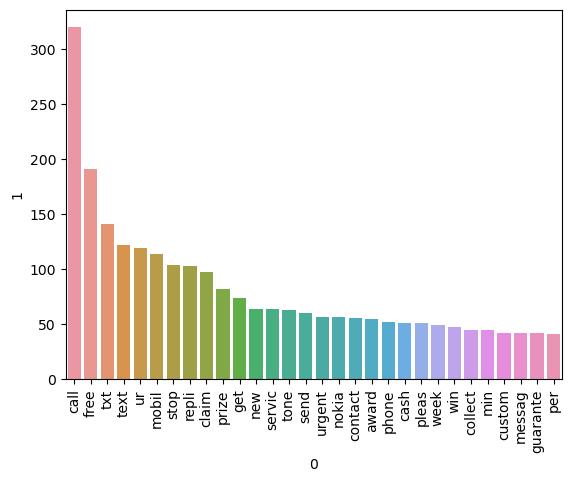

In [209]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [210]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\grainstudio\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


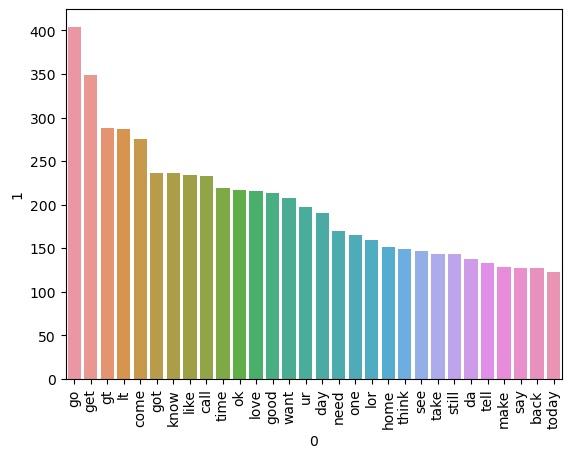

In [211]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [213]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text,num_characters_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi great world l...,72
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif oni,19


In [250]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [251]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [252]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [253]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [256]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [257]:
gnb = GaussianNB() 
mnb = MultinomialNB() 
bnb = BernoulliNB()

In [258]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [259]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [241]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [260]:
import pickle

In [262]:
pickle.dump(tfidf, open('vectorizer1.pkl', 'wb'))
pickle.dump(mnb, open('new_model1.pkl', 'wb'))

In [263]:
!pip install scipy

NameError: name 'python' is not defined